In [2]:
!kaggle datasets download -d nelakurthisudheer/mall-customer-segmentation

Dataset URL: https://www.kaggle.com/datasets/nelakurthisudheer/mall-customer-segmentation
License(s): unknown
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 3.63MB/s]


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [20]:
# Load the dataset
customers_data = pd.read_csv('/content/mall-customer-segmentation.zip')


In [21]:
print(customers_data.head())
print(customers_data.info())
print(customers_data.isnull().sum())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                 

In [23]:
# Select relevant features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = customers_data[features].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


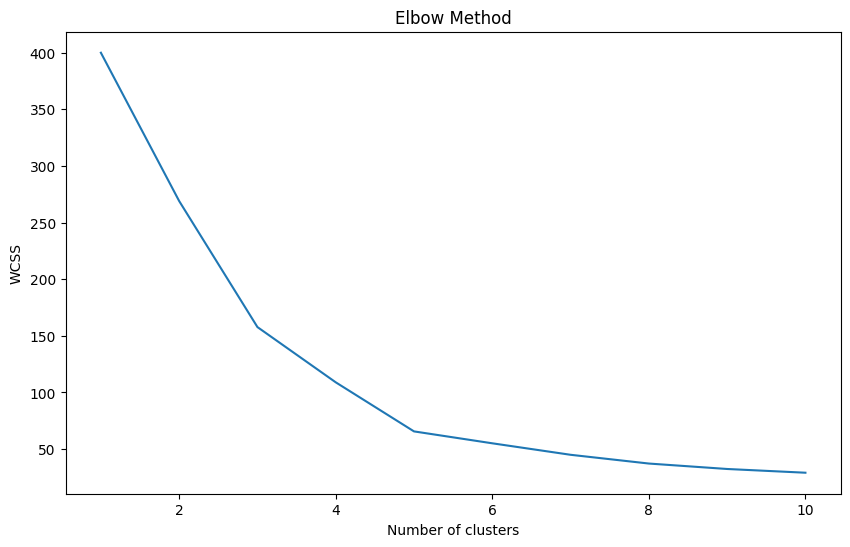

In [24]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

In [26]:
optimal_clusters = np.argmax(silhouette_scores) + 2

In [27]:
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=0)
labels = kmeans.fit_predict(X_scaled)
cluster_centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


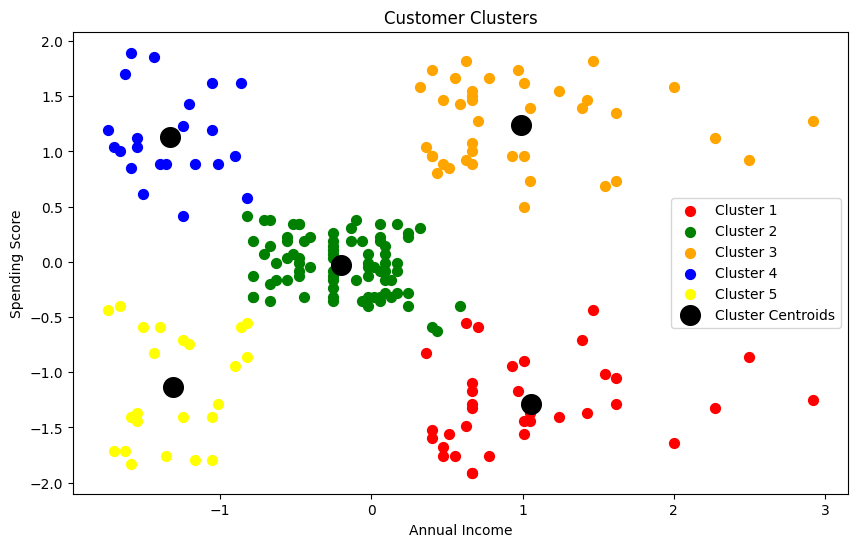

In [28]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'orange', 'blue', 'yellow']
for i in range(optimal_clusters):
    plt.scatter(X_scaled[labels == i, 0], X_scaled[labels == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='black', label='Cluster Centroids')
plt.title('Customer Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


In [29]:
# Analyze the clusters
for i in range(optimal_clusters):
    cluster_data = customers_data[labels == i]
    print(f'Cluster {i+1}:')
    print(cluster_data.describe())
    print()

Cluster 1:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
count   35.000000  35.000000           35.000000               35.000000
mean   164.371429  41.114286           88.200000               17.114286
std     21.457325  11.341676           16.399067                9.952154
min    125.000000  19.000000           70.000000                1.000000
25%    148.000000  34.000000           77.500000               10.000000
50%    165.000000  42.000000           85.000000               16.000000
75%    182.000000  47.500000           97.500000               23.500000
max    199.000000  59.000000          137.000000               39.000000

Cluster 2:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
count   81.000000  81.000000           81.000000               81.000000
mean    86.320988  42.716049           55.296296               49.518519
std     24.240889  16.447822            8.988109                6.530909
min     44.000000  18.000000